In [81]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [118]:
df = pd.read_excel("Realized Schedule 20210101-20220208.xlsx")
print(f"{len(df)} observations.")
df.head()

36770 observations.


,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor
0,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142,0.408451
1,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74,0.189189
2,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142,0.570423
3,2021-01-01 13:20:00,CN,514,EST,AT7,J,US,72,0.333333
4,2021-01-01 14:20:00,LJ,3140,DEN,32A,J,US,186,0.204301


Create additional features based on ScheduleTime

In [119]:
df['Minute'] = df['ScheduleTime'].dt.minute
df['Hour'] = df['ScheduleTime'].dt.hour
df['Day'] = df['ScheduleTime'].dt.day
df['Week'] = df['ScheduleTime'].dt.isocalendar().week
df['Month'] = df['ScheduleTime'].dt.month

In [120]:
df.head()

,ScheduleTime,Airline,FlightNumber,Destination,AircraftType,FlightType,Sector,SeatCapacity,LoadFactor,Minute,Hour,Day,Week,Month
0,2021-01-01 06:35:00,IA,874,DEN,73W,J,US,142,0.408451,35,6,1,53,1
1,2021-01-01 10:35:00,JZ,818,YHM,AT7,J,CA,74,0.189189,35,10,1,53,1
2,2021-01-01 12:05:00,IA,876,DEN,73W,J,US,142,0.570423,5,12,1,53,1
3,2021-01-01 13:20:00,CN,514,EST,AT7,J,US,72,0.333333,20,13,1,53,1
4,2021-01-01 14:20:00,LJ,3140,DEN,32A,J,US,186,0.204301,20,14,1,53,1


Let's have a look at the overall LoadFactor distribution

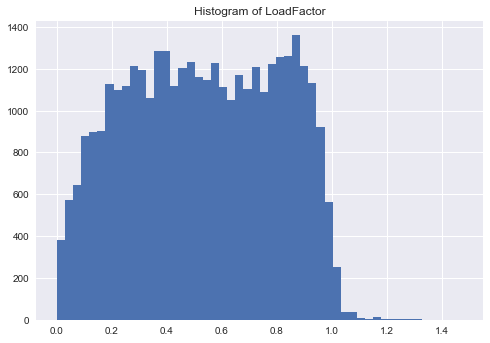

In [121]:
plt.hist(df['LoadFactor'], bins=50)
plt.title("Histogram of LoadFactor")
plt.show()

Perhaps not all Airlines are equally good at keeping a high load factor. Let's check the top 30 airlines (there are 95 in total) with the most flights

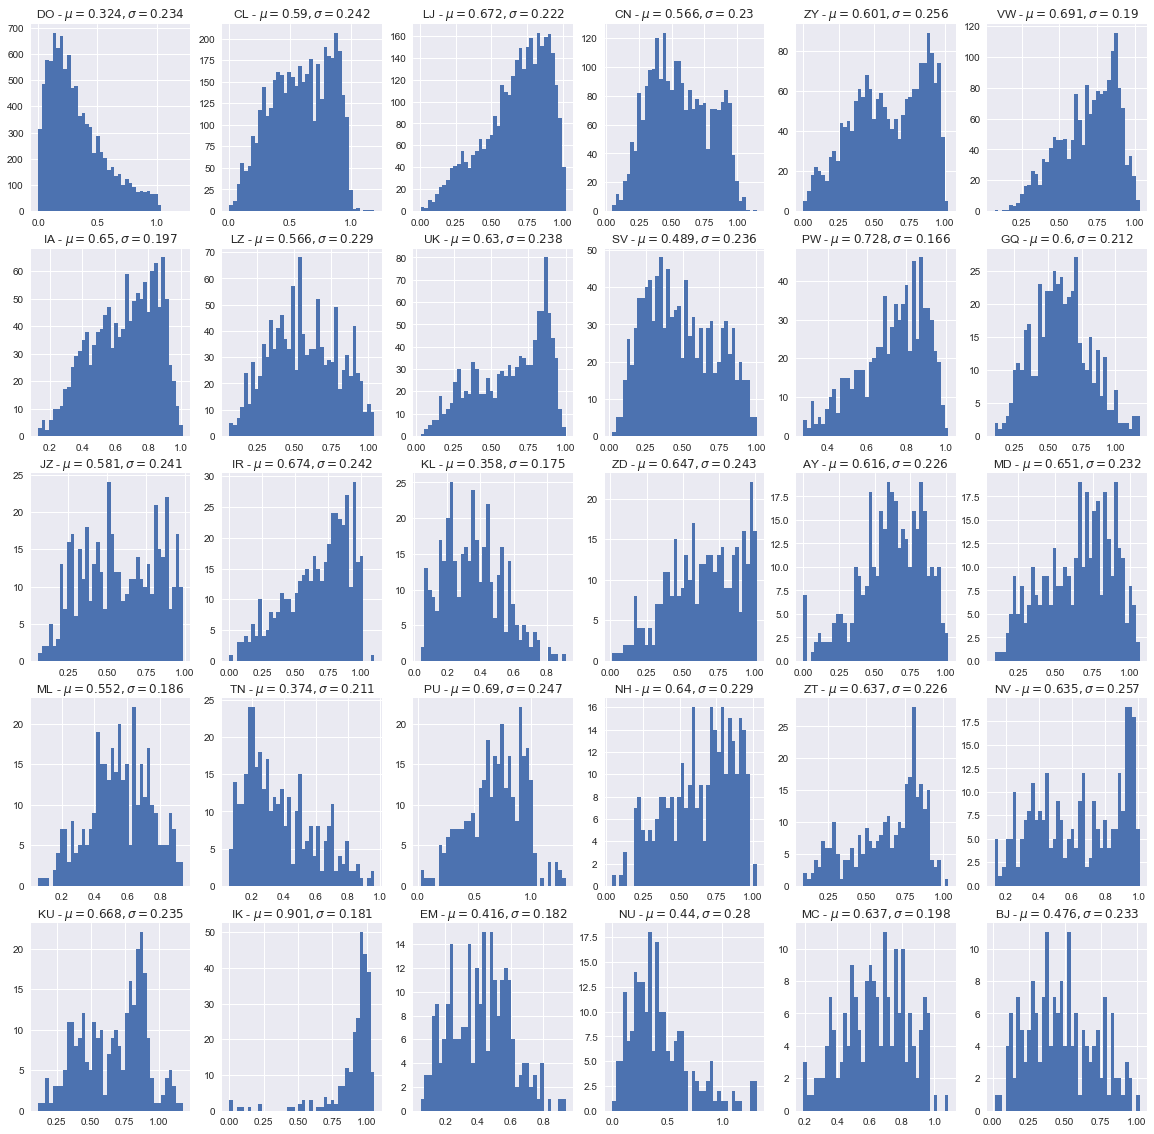

In [122]:
fig, axs = plt.subplots(5,6, figsize=(20,20))

for i, (airline, ax) in enumerate(zip(df['Airline'].value_counts().index[:30], axs.flatten())):
    loadfactors = df[df['Airline'] == airline]['LoadFactor']
    ax.hist(loadfactors, bins=40)
    ax.set_title(f"{airline} - $\mu={round(loadfactors.mean(),3)}, \sigma={round(loadfactors.std(), 3)}$")
plt.show()

The sectors seems to be highly dominated by CA and US. Let's group the rest in "Others" which will come in handy when doing one-hot-encoding.

In [123]:
df['Sector'].value_counts()

CA    17906
US    17575
IS      450
QA      345
AE      165
DK       95
SG       95
EG       88
CN       44
IQ        3
NL        1
MX        1
Name: Sector, dtype: int64

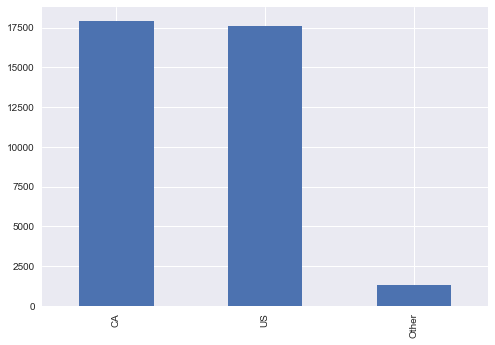

In [124]:
df['Sector'] = df['Sector'].apply(lambda x: x if x in ['CA', 'US'] else 'Other')
df['Sector'].value_counts().plot(kind='bar')
plt.show()

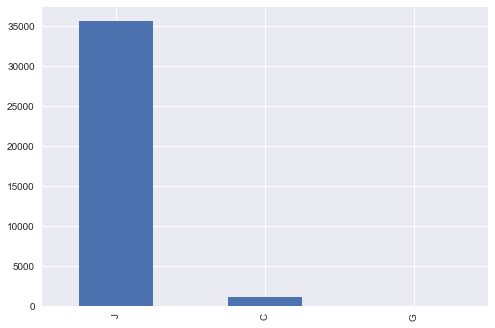

In [88]:
df['FlightType'].value_counts().plot(kind='bar')
plt.show()

In [129]:
df['AircraftType'].value_counts()[:10]

73H    8317
32N    5707
CR9    3367
AT7    3248
319    2940
320    2834
32A    1815
E90    1213
32Q     711
359     627
Name: AircraftType, dtype: int64

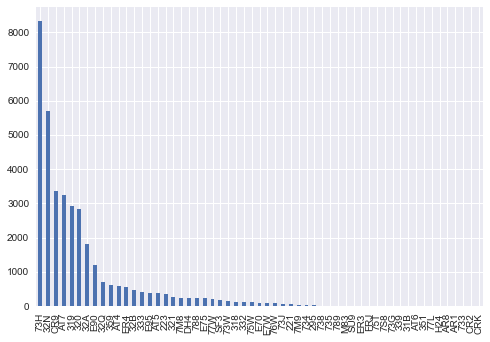

In [89]:
df['AircraftType'].value_counts().plot(kind='bar')
plt.show()